In [10]:
import os
os.chdir("/content/drive/MyDrive/Colab/RNN/Price Prediction LSTM")

In [37]:
import numpy as np
import pandas as pd
from keras.layers import Dense , LSTM , Input
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential , Model
import matplotlib.pyplot as plt

In [24]:
data_path = './data'
data = pd.read_csv(os.path.join(data_path , 'all_stocks_5yr.csv'))
cl = data[data['Name']=='MMM'].Close.values

In [25]:
scl = MinMaxScaler()
#scale the data
cl = cl.reshape(cl.shape[0] , 1 )
cl = scl.fit_transform(cl)
cl

array([[0.0403808 ],
       [0.03958747],
       [0.04149147],
       ...,
       [0.94541848],
       [0.94343514],
       [0.9414518 ]])

In [28]:
#create a function to process the data into 7 day look back slices
def process_data(data , lb):
  x , y = [] , []

  for i in range(len(data)-lb-1):
    x.append(data[i : i+lb , 0])
    y.append(data[i+lb , 0])

  return np.array(x) , np.array(y)

In [29]:
x , y = process_data(cl , 7)
for i in range(5):
  print(x[i] , '>>>>>>' , y[i])

[0.0403808  0.03958747 0.04149147 0.0510115  0.05497818 0.05220151
 0.04680682] >>>>>> 0.042602142007140076
[0.03958747 0.04149147 0.0510115  0.05497818 0.05220151 0.04680682
 0.04260214] >>>>>> 0.03704879016263385
[0.04149147 0.0510115  0.05497818 0.05220151 0.04680682 0.04260214
 0.03704879] >>>>>> 0.04379214597381986
[0.0510115  0.05497818 0.05220151 0.04680682 0.04260214 0.03704879
 0.04379215] >>>>>> 0.041888139627132115
[0.05497818 0.05220151 0.04680682 0.04260214 0.03704879 0.04379215
 0.04188814] >>>>>> 0.03958746529155088


In [32]:
x_train , x_test = x[:int(x.shape[0] * 0.80)] , x[int(x.shape[0] * 0.80):]
y_train , y_test = y[:int(y.shape[0] * 0.80)] , y[int(x.shape[0] * 0.80):]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 7)
(250, 7)
(1000,)
(250,)


In [33]:
x_train = np.expand_dims(x_train , axis=2)
x_test = np.expand_dims(x_test , axis=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 7, 1)
(250, 7, 1)
(1000,)
(250,)


In [38]:
inputs = Input(shape = (7 , 1) , name='inputs')
x = inputs
x = LSTM(units = 256 , name = 'LSTM')(x)
outputs = Dense(1 , name= 'outputs')(x)

model = Model(inputs , outputs , name = 'model')

model.compile(optimizer= 'adam' ,
              loss = 'mse')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 7, 1)]            0         
                                                                 
 LSTM (LSTM)                 (None, 256)               264192    
                                                                 
 outputs (Dense)             (None, 1)                 257       
                                                                 
Total params: 264449 (1.01 MB)
Trainable params: 264449 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = model.fit(x_train ,
                    y_train ,
                    epochs = 300 ,
                    validation_data  = (x_test , y_test) ,
                    shuffle = False)

Epoch 1/300
32/32 [==============================] - 8s 19ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 9.3381e-04
Epoch 3/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 4/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 8.8551e-04
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 6.4850e-04 - val_loss: 0.0014
Epoch 6/300
32/32 [==============================] - 0s 5ms/step - loss: 8.2861e-04 - val_loss: 6.5905e-04
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 8/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 9/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 10/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0051 - val_l

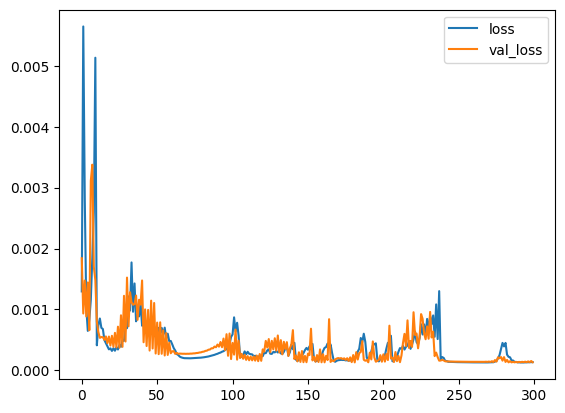

In [40]:
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show();

8/8 [==============================] - 0s 3ms/step


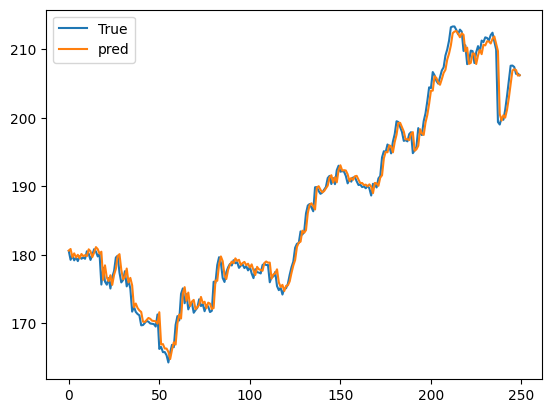

In [42]:
x_predicted = model.predict(x_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1 , 1)) , label = 'True')
plt.plot(scl.inverse_transform(x_predicted), label = 'pred');
plt.legend()
plt.show();

In [43]:
data

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM
...,...,...,...,...,...,...,...
606796,2017-08-07,62.12,62.34,61.25,61.83,4208287.0,ZTS
606797,2017-08-08,60.49,61.00,59.50,60.00,4663668.0,ZTS
606798,2017-08-09,59.95,60.87,59.76,60.81,4017297.0,ZTS
606799,2017-08-10,60.87,61.37,59.71,59.74,2690725.0,ZTS
